In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import box

In [3]:
data = xr.open_dataset("geospatial_test_datacube.nc") # Loading geospatial data

In [4]:
data

<xarray.Dataset>
Dimensions:   (time: 23, y: 227, x: 304)
Coordinates:
  * time      (time) datetime64[ns] 2021-04-09 2021-04-14 ... 2021-11-25
  * y         (y) float32 45.23 45.23 45.23 45.23 ... 45.21 45.21 45.21 45.21
  * x         (x) float32 -69.95 -69.95 -69.95 -69.95 ... -69.92 -69.92 -69.92
Data variables:
    S2_RED    (time, y, x) float32 ...
    S2_GREEN  (time, y, x) float32 ...
    S2_BLUE   (time, y, x) float32 ...
    S2_NIR    (time, y, x) float32 ...
Attributes:
    transform:        [ 8.98405270e-05  0.00000000e+00 -6.99499045e+01  0.000...
    crs:              +init=epsg:4326
    res:              [8.98405270e-05 9.04387077e-05]
    descriptions:     ['RED', 'GREEN', 'BLUE', 'NIR']
    AREA_OR_POINT:    Area
    _FillValue:       nan
    s2_data_lineage:  {"Data origin": "S3 bucket (ARN=arn:aws:s3:::sentinel-c...
    ulx, uly:         [-69.94990454  45.23320715]

In [5]:
data.variables # Get to know our variables

Frozen({'time': <xarray.IndexVariable 'time' (time: 23)>
array(['2021-04-09T00:00:00.000000000', '2021-04-14T00:00:00.000000000',
       '2021-04-27T00:00:00.000000000', '2021-05-07T00:00:00.000000000',
       '2021-05-19T00:00:00.000000000', '2021-05-24T00:00:00.000000000',
       '2021-05-29T00:00:00.000000000', '2021-06-18T00:00:00.000000000',
       '2021-07-28T00:00:00.000000000', '2021-08-10T00:00:00.000000000',
       '2021-08-12T00:00:00.000000000', '2021-08-25T00:00:00.000000000',
       '2021-09-04T00:00:00.000000000', '2021-09-16T00:00:00.000000000',
       '2021-09-19T00:00:00.000000000', '2021-09-21T00:00:00.000000000',
       '2021-10-06T00:00:00.000000000', '2021-10-09T00:00:00.000000000',
       '2021-10-29T00:00:00.000000000', '2021-11-05T00:00:00.000000000',
       '2021-11-20T00:00:00.000000000', '2021-11-23T00:00:00.000000000',
       '2021-11-25T00:00:00.000000000'], dtype='datetime64[ns]'), 'S2_RED': <xarray.Variable (time: 23, y: 227, x: 304)>
[1587184 values wit

In [6]:
data_aoi = gpd.read_file('geospatial_sub_aoi.geojson') # Loading the geospatial_sub_aoi file

In [7]:
data_aoi.head()

,geometry
0,"POLYGON ((-69.94867 45.23227, -69.94900 45.217..."


In [8]:
data_aoi.geometry.head()

0    POLYGON ((-69.94867 45.23227, -69.94900 45.217...
Name: geometry, dtype: geometry

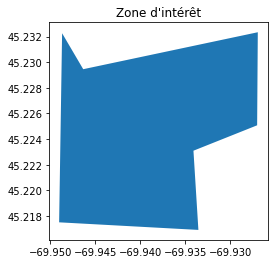

In [9]:
# Viewing the area of interest
data_aoi.plot()
plt.title('Zone d\'intérêt')
plt.show()

In [10]:
# Checking for the presence of NaN values in a spectral band
def verif_nan(bande):
    nb_nan = data[bande].isnull().sum()
    print("Nombre de valeurs NaN dans la bande {}: {}".format(bande, nb_nan))

In [11]:
verif_nan('S2_RED')

Nombre de valeurs NaN dans la bande S2_RED: 0


In [12]:
verif_nan('S2_BLUE')

Nombre de valeurs NaN dans la bande S2_BLUE: 0


In [13]:
verif_nan('S2_GREEN')

Nombre de valeurs NaN dans la bande S2_GREEN: 0


## Question 1

In [14]:
ndvi_data = (data['S2_NIR'] - data['S2_RED']) / (data['S2_NIR'] + data['S2_RED']) # NDVI calculation for each date

In [15]:
ndvi_data

<xarray.DataArray (time: 23, y: 227, x: 304)>
array([[[0.62311345, 0.62311345, 0.6612276 , ..., 0.738523  ,
         0.7610312 , 0.7610312 ],
        [0.78484946, 0.78484946, 0.7461864 , ..., 0.729616  ,
         0.7360574 , 0.7360574 ],
        [0.7316661 , 0.7316661 , 0.6671105 , ..., 0.62512076,
         0.78181815, 0.78181815],
        ...,
        [0.6911272 , 0.48504552, 0.48504552, ..., 0.5377561 ,
         0.47117797, 0.5424836 ],
        [0.6953793 , 0.5753992 , 0.5753992 , ..., 0.37571156,
         0.5851346 , 0.7231702 ],
        [0.7114915 , 0.66701144, 0.66701144, ..., 0.5881436 ,
         0.77481365, 0.7161048 ]],

       [[0.44147158, 0.44147158, 0.54115593, ..., 0.7959596 ,
         0.78008753, 0.78008753],
        [0.7433155 , 0.7433155 , 0.75518537, ..., 0.77339894,
         0.782801  , 0.782801  ],
        [0.75450593, 0.75450593, 0.7139296 , ..., 0.74929094,
         0.7554786 , 0.7554786 ],
...
        [0.63016534, 0.551181  , 0.551181  , ..., 0.73238176,
         0.655527  , 0.75266325],
        [0.7659138 , 0.60186625, 0.60186625, ..., 0.69435215,
         0.6860171 , 0.7511521 ],
        [0.8212407 , 0.6822595 , 0.6822595 , ..., 0.6744809 ,
         0.827792  , 0.8098721 ]],

       [[0.6601942 , 0.6601942 , 0.59090906, ..., 0.8777293 ,
         0.9566983 , 0.9566983 ],
        [0.7951604 , 0.7951604 , 0.7686291 , ..., 0.8796993 ,
         0.9171742 , 0.9171742 ],
        [0.80886245, 0.80886245, 0.70818067, ..., 0.86597943,
         0.8496733 , 0.8496733 ],
        ...,
        [0.66309774, 0.59760153, 0.59760153, ..., 0.66493595,
         0.60098314, 0.69693094],
        [0.6629002 , 0.5866314 , 0.5866314 , ..., 0.6846325 ,
         0.71889406, 0.7132915 ],
        [0.76829267, 0.6347826 , 0.6347826 , ..., 0.7311089 ,
         0.8158915 , 0.7271214 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2021-04-09 2021-04-14 ... 2021-11-25
  * y        (y) float32 45.23 45.23 45.23 45.23 ... 45.21 45.21 45.21 45.21
  * x        (x) float32 -69.95 -69.95 -69.95 -69.95 ... -69.92 -69.92 -69.92

In [16]:
data['NDVI'] = ndvi_data # Add NDVI layer to existing data cube

In [17]:
# Save the updated data cube in a new netCDF file
data.to_netcdf('sentinel2_datacube_avc_ndvi.nc')

In [19]:
data1 = xr.open_dataset("sentinel2_datacube_avc_ndvi.nc")

In [20]:
data1

<xarray.Dataset>
Dimensions:   (time: 23, y: 227, x: 304)
Coordinates:
  * time      (time) datetime64[ns] 2021-04-09 2021-04-14 ... 2021-11-25
  * y         (y) float32 45.23 45.23 45.23 45.23 ... 45.21 45.21 45.21 45.21
  * x         (x) float32 -69.95 -69.95 -69.95 -69.95 ... -69.92 -69.92 -69.92
Data variables:
    S2_RED    (time, y, x) float32 ...
    S2_GREEN  (time, y, x) float32 ...
    S2_BLUE   (time, y, x) float32 ...
    S2_NIR    (time, y, x) float32 ...
    NDVI      (time, y, x) float32 ...
Attributes:
    transform:        [ 8.98405270e-05  0.00000000e+00 -6.99499045e+01  0.000...
    crs:              +init=epsg:4326
    res:              [8.98405270e-05 9.04387077e-05]
    descriptions:     ['RED', 'GREEN', 'BLUE', 'NIR']
    AREA_OR_POINT:    Area
    _FillValue:       nan
    s2_data_lineage:  {"Data origin": "S3 bucket (ARN=arn:aws:s3:::sentinel-c...
    ulx, uly:         [-69.94990454  45.23320715]

## Question 1 b

In [21]:
date_exemple = '2021-04-09' # Select a specific date to create the RGB image

In [22]:
# Select red, green and blue stripes for this date
bande_rouge = data1['S2_RED'].sel(time=date_exemple)
bande_verte = data1['S2_GREEN'].sel(time=date_exemple)
bande_bleue = data1['S2_BLUE'].sel(time=date_exemple)

In [23]:
rgb_image = np.stack([bande_rouge, bande_verte, bande_bleue], axis=-1) # RGB image creation

In [24]:
rgb_image = rgb_image / rgb_image.max() # Normalize pixel values to the range [0, 1].

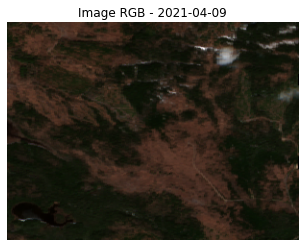

In [25]:
# Display RGB image
plt.imshow(rgb_image)
plt.title('Image RGB - {}'.format(date_exemple))
plt.axis('off')
plt.show()

## Question 1 c

In [29]:
ndvi_all_dates = data1['NDVI'] # Select NDVI layer for all dates

In [30]:
ndvi_val = ndvi_all_dates.values.flatten() # Stack NDVI values for all dates

In [31]:
ndvi_val = ndvi_val[~np.isnan(ndvi_val)] # Delete NaN values

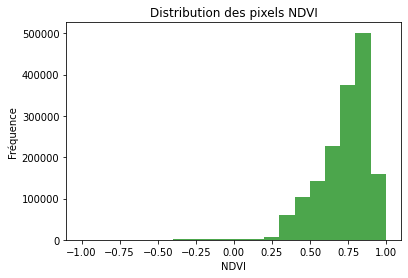

In [32]:
# Display histogram of NDVI values
plt.hist(ndvi_val, bins=20, color='green', alpha=0.7)
plt.title('Distribution des pixels NDVI')
plt.xlabel('NDVI')
plt.ylabel('Fréquence')
plt.show()

## Question 1 d

In [33]:
ndvi_all_dates = data1['NDVI'] # Select NDVI layer for entire data cube

In [34]:
num_times = ndvi_all_dates.sizes['time'] # Extract dimensions from the dataset

In [35]:
ndvi_moy = [] # Initialize a list to store NDVI averages for each date

In [36]:
# Loop on each date to calculate the average NDVI over the entire AOI
for i in range(num_times):
    ndvi_date = ndvi_all_dates.isel(time=i)
    ndvi_mean = ndvi_date.mean()
    ndvi_moy.append(ndvi_mean)

In [37]:
ndvi_moy = np.array(ndvi_moy) # Convert the list into a NumPy array

In [38]:
dates = ndvi_all_dates.time.values # Create a date table for the x axis

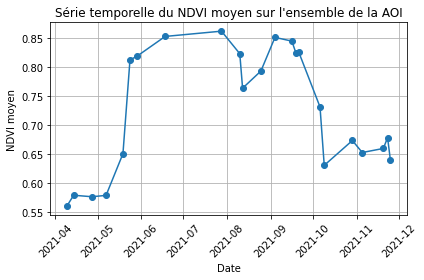

In [39]:
# Plot the time series of mean NDVI over the entire AOI
plt.plot(dates, ndvi_moy, marker='o', linestyle='-')
plt.title('Série temporelle du NDVI moyen sur l\'ensemble de la AOI')
plt.xlabel('Date')
plt.ylabel('NDVI moyen')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Question 2

## Interpretation of spatial distribution and NDVI/vegetation trends

**Spatial distribution of NDVI:**

The histogram of NDVI pixels shows that the area is dominated by vegetation, with varying levels of cover density. The RGB image allows us to visualize and understand how vegetation is distributed in space. The presence of non-vegetated areas, such as bare soil, in the RGB image is correlated with low NDVI values.

**Temporal evolution of NDVI:**

The mean NDVI time series shows a seasonal pattern, with higher values in spring and summer when vegetation is actively growing, and lower values in autumn and winter when vegetation is dormant.


## Question 3

In [41]:
aoi_limites = data_aoi.geometry.total_bounds # Extracting AOI limits

In [42]:
aoi_box = box(*aoi_limites) # Create bounding box geometry from AOI boundaries

In [43]:
x_min, y_min, x_max, y_max = aoi_limites # Select the x and y coordinates of the AOI

In [44]:
ndvi_clipper = data1['NDVI'].sel(x=slice(x_min, x_max), y=slice(y_max, y_min)) # Clipping NDVI to AOI

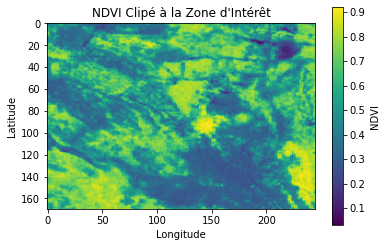

In [45]:
# Display clipped NDVI
plt.imshow(ndvi_clipper[0], cmap='viridis')
plt.colorbar(label='NDVI')
plt.title('NDVI Clipé à la Zone d\'Intérêt')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()